# Clean GSS Variables used in Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

In [2]:
# Read in the GSS variables.
path = 'gss.hdf5'
gss = pd.read_hdf(path, key='gss')
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,size,year
0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,72,1972
1,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,72,1972
2,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,72,1972
3,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,72,1972
4,NaN,2.0,NaN,28.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,72,1972


In [3]:
def make_plots(percentages, index):
    for column in percentages.columns[1:index]:
        plt.plot(percentages['year'], percentages[column], label=" ".join(column.split()[:-1]))
        
    plt.legend()
    plt.title("Always Wrong")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.show()
    
    for column in percentages.columns[index:]:
        plt.plot(percentages['year'], percentages[column], label=" ".join(column.split()[:-1]))
        
    plt.legend()
    plt.title("Never Wrong")
    plt.xlabel("Year")
    plt.ylabel("Percent")
    plt.show()

## Cohort-Period Analysis

### Sex

In [4]:
grouped_year = gss.groupby('year')

columns = ['year', 'male always', 'female always', 'male never', 'female never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_sex = group.groupby('sex')
    male_homosex = grouped_sex.get_group(1)['homosex'].dropna()
    female_homosex = grouped_sex.get_group(2)['homosex'].dropna()
    
    percent_male_always = (male_homosex == 1).mean() * 100
    percent_male_never = (male_homosex == 4).mean() * 100
    percent_female_always = (female_homosex == 1).mean() * 100
    percent_female_never = (female_homosex == 4).mean() * 100
    
    row = pd.DataFrame([[year, percent_male_always, percent_female_always, percent_male_never, percent_female_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

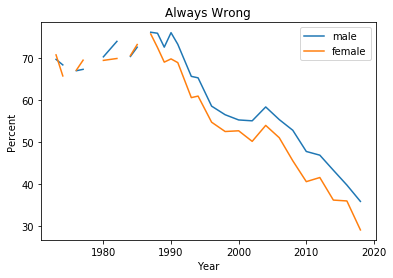

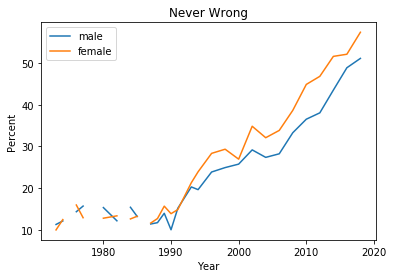

In [5]:
make_plots(percentages, 3)

Is there a dip in the 1980s?

### Income

In [6]:
grouped_year = gss.groupby('year')

columns = ['year',
           '<10 always',
           '10-30 always',
           '30-50 always',
           '50-70 always',
           '70-90 always',
           '>90 always',
           '<10 never',
           '10-30 never',
           '30-50 never',
           '50-70 never',
           '70-90 never',
           '>90 never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    inc1 = group[(group['realrinc'] < 10000)]
    percent_inc1_always = (inc1['homosex'].dropna() == 1).mean()
    percent_inc1_never = (inc1['homosex'].dropna() == 4).mean()
    
    inc2 = group[(group['realrinc'] >= 10000) & (group['realrinc'] < 30000)]
    percent_inc2_always = (inc2['homosex'].dropna() == 1).mean()
    percent_inc2_never = (inc2['homosex'].dropna() == 4).mean()
    
    inc3 = group[(group['realrinc'] >= 30000) & (group['realrinc'] < 50000)]
    percent_inc3_always = (inc3['homosex'].dropna() == 1).mean()
    percent_inc3_never = (inc3['homosex'].dropna() == 4).mean()
    
    inc4 = group[(group['realrinc'] >= 50000) & (group['realrinc'] < 70000)]
    percent_inc4_always = (inc4['homosex'].dropna() == 1).mean()
    percent_inc4_never = (inc4['homosex'].dropna() == 4).mean()
    
    inc5 = group[(group['realrinc'] >= 70000) & (group['realrinc'] < 90000)]
    percent_inc5_always = (inc5['homosex'].dropna() == 1).mean()
    percent_inc5_never = (inc5['homosex'].dropna() == 4).mean()
    
    inc6 = group[(group['realrinc'] >= 90000)]
    percent_inc6_always = (inc6['homosex'].dropna() == 1).mean()
    percent_inc6_never = (inc6['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         percent_inc1_always,
                         percent_inc2_always,
                         percent_inc3_always,
                         percent_inc4_always,
                         percent_inc5_always,
                         percent_inc6_always,
                         percent_inc1_never,
                         percent_inc2_never,
                         percent_inc3_never,
                         percent_inc4_never,
                         percent_inc5_never,
                         percent_inc6_never]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

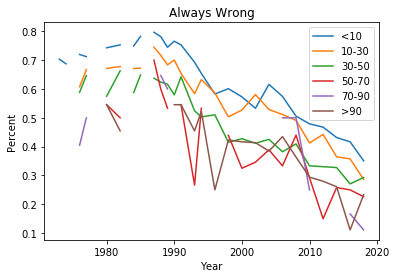

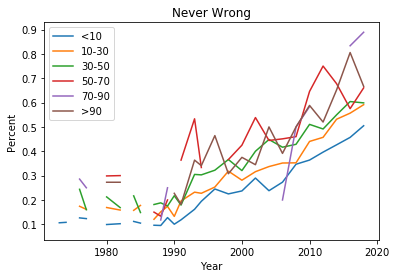

In [7]:
make_plots(percentages, 7)

### Political Affiliation

In [8]:
grouped_year = gss.groupby('year')

columns = ['year',
          'ext lib always',
          'lib always',
          'sl lib always',
          'mod always',
          'sl con always',
          'con always',
          'ext con always',
          'ext lib never',
          'lib never',
          'sl lib never',
          'mod never',
          'sl con never',
          'con never',
          'ext con never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_pol = group.groupby('polviews')
    keys = list(grouped_pol.groups.keys())
    if len(keys) == 7:
        ela = (grouped_pol.get_group(1)['homosex'].dropna() == 1).mean()
        la = (grouped_pol.get_group(2)['homosex'].dropna() == 1).mean()
        sla = (grouped_pol.get_group(3)['homosex'].dropna() == 1).mean()
        ma = (grouped_pol.get_group(4)['homosex'].dropna() == 1).mean()
        sca = (grouped_pol.get_group(5)['homosex'].dropna() == 1).mean()
        ca = (grouped_pol.get_group(6)['homosex'].dropna() == 1).mean()
        eca = (grouped_pol.get_group(7)['homosex'].dropna() == 1).mean()
        
        eln = (grouped_pol.get_group(1)['homosex'].dropna() == 4).mean()
        ln = (grouped_pol.get_group(2)['homosex'].dropna() == 4).mean()
        sln = (grouped_pol.get_group(3)['homosex'].dropna() == 4).mean()
        mn = (grouped_pol.get_group(4)['homosex'].dropna() == 4).mean()
        scn = (grouped_pol.get_group(5)['homosex'].dropna() == 4).mean()
        cn = (grouped_pol.get_group(6)['homosex'].dropna() == 4).mean()
        ecn = (grouped_pol.get_group(7)['homosex'].dropna() == 4).mean()
        row = pd.DataFrame([[year, ela, la, sla, ma, sca, ca, eca, eln, ln, sln, mn, scn, cn, ecn]], columns=columns)

        percentages = percentages.append(row, ignore_index=True)

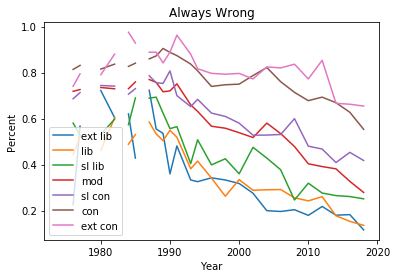

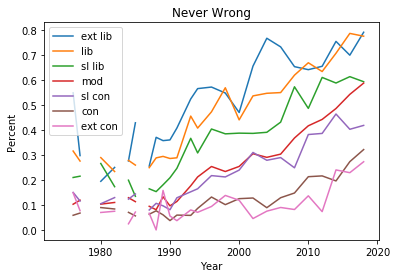

In [9]:
make_plots(percentages, 8)

### Religion

In [10]:
grouped_year = gss.groupby('year')
rel = gss.groupby('relig')

# Only the first 5 categories have consistent numbers of respondants.
columns = ['year',
          'protestant always',
          'catholic always',
          'jewish always',
          'none always',
          'other always',
          'protestant never',
          'catholic never',
          'jewish never',
          'none never',
          'other never'
          ]

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_relig = group.groupby('relig')
    keys = list(grouped_relig.groups.keys())
    
    pa = (grouped_relig.get_group(1)['homosex'].dropna() == 1).mean()
    ca = (grouped_relig.get_group(2)['homosex'].dropna() == 1).mean()
    ja = (grouped_relig.get_group(3)['homosex'].dropna() == 1).mean()
    na = (grouped_relig.get_group(4)['homosex'].dropna() == 1).mean()
    oa = (grouped_relig.get_group(5)['homosex'].dropna() == 1).mean()
    
    pn = (grouped_relig.get_group(1)['homosex'].dropna() == 4).mean()
    cn = (grouped_relig.get_group(2)['homosex'].dropna() == 4).mean()
    jn = (grouped_relig.get_group(3)['homosex'].dropna() == 4).mean()
    nn = (grouped_relig.get_group(4)['homosex'].dropna() == 4).mean()
    on = (grouped_relig.get_group(5)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, pa, ca, ja, na, oa, pn, cn, jn, nn, on]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

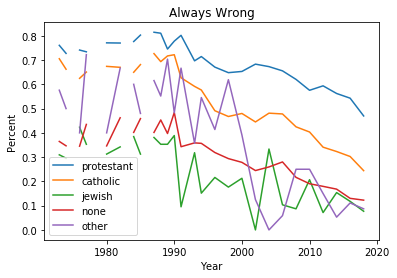

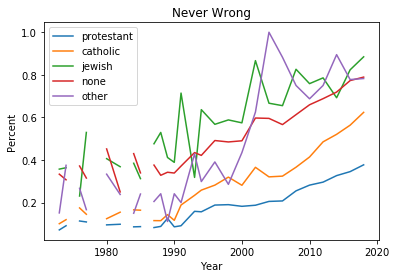

In [11]:
make_plots(percentages, 6)

### Fundamentalism

In [12]:
grouped_year = gss.groupby('year')

columns = ['year',
          'fundamentalist always',
          'moderate always',
          'liberal always',
          'fundamentalist never',
          'moderate never',
          'liberal never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_fund = group.groupby('fund')
    
    fa = (grouped_fund.get_group(1)['homosex'].dropna() == 1).mean()
    ma = (grouped_fund.get_group(2)['homosex'].dropna() == 1).mean()
    la = (grouped_fund.get_group(3)['homosex'].dropna() == 1).mean()
    
    fn = (grouped_fund.get_group(1)['homosex'].dropna() == 4).mean()
    mn = (grouped_fund.get_group(2)['homosex'].dropna() == 4).mean()
    ln = (grouped_fund.get_group(3)['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year, fa, ma, la, fn, mn, ln]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

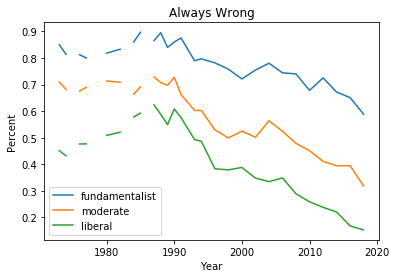

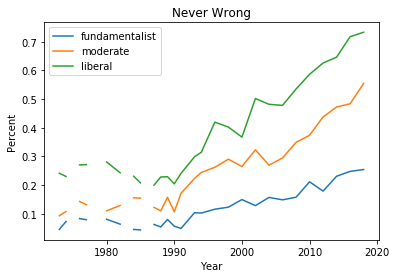

In [13]:
make_plots(percentages, 4)

### Marital Status

In [14]:
grouped_year = gss.groupby('year')

columns = ['year', 
           'married always', 
           'widowed always', 
           'divorced always', 
           'separated always', 
           'never married always',
           'married never', 
           'widowed never', 
           'divorced never', 
           'separated never', 
           'never married never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    grouped_mar = group.groupby('marital')
    
    married_homosex = grouped_mar.get_group(1)['homosex'].dropna()
    widowed_homosex = grouped_mar.get_group(2)['homosex'].dropna()
    divorced_homosex = grouped_mar.get_group(3)['homosex'].dropna()
    separated_homosex = grouped_mar.get_group(4)['homosex'].dropna()
    nev_married_homosex = grouped_mar.get_group(5)['homosex'].dropna()

    ma = (married_homosex == 1).mean()
    wa = (widowed_homosex == 1).mean()
    da = (divorced_homosex == 1).mean()
    sa = (separated_homosex == 1).mean()
    na = (nev_married_homosex == 1).mean()
    
    mn = (married_homosex == 4).mean()
    wn = (widowed_homosex == 4).mean()
    dn = (divorced_homosex == 4).mean()
    sn = (separated_homosex == 4).mean()
    nn = (nev_married_homosex == 4).mean()
    
    row = pd.DataFrame([[year, ma, wa, da, sa, na, mn, wn, dn, sn, nn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

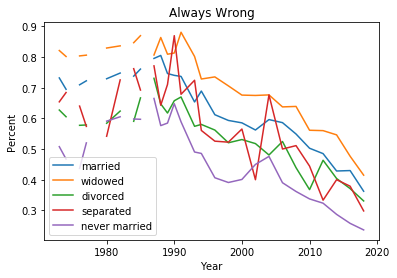

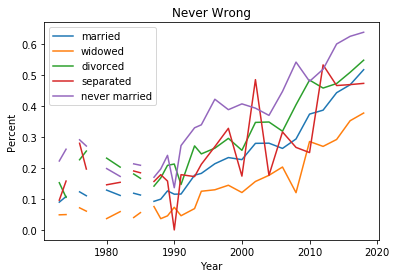

In [15]:
make_plots(percentages, 6)

### Age

In [16]:
grouped_year = gss.groupby('year')

columns = ['year',
           '20s always',
           '30s always',
           '40s always',
           '50s always',
           '60s always',
           '70s always',
           '80s always',
           '20s never',
           '30s never',
           '40s never',
           '50s never',
           '60s never',
           '70s never',
           '80s never']

percentages = pd.DataFrame([], columns=columns)


for year, group in grouped_year:
    
    twenty = group[(group['age'] < 30)]
    thirty = group[(group['age'] >= 30) & (group['age'] < 40)]
    fourty = group[(group['age'] >= 40) & (group['age'] < 50)]
    fifty = group[(group['age'] >= 50) & (group['age'] < 60)]
    sixty = group[(group['age'] >= 60) & (group['age'] < 70)]
    seventy = group[(group['age'] >= 70) & (group['age'] < 80)]
    eighty = group[(group['age'] >= 80) & (group['age'] <= 89)]
    
    a20 = (twenty['homosex'].dropna() == 1).mean()
    a30 = (thirty['homosex'].dropna() == 1).mean()
    a40 = (fourty['homosex'].dropna() == 1).mean()
    a50 = (fifty['homosex'].dropna() == 1).mean()
    a60 = (sixty['homosex'].dropna() == 1).mean()
    a70 = (seventy['homosex'].dropna() == 1).mean()
    a80 = (eighty['homosex'].dropna() == 1).mean()
    
    n20 = (twenty['homosex'].dropna() == 4).mean()
    n30 = (thirty['homosex'].dropna() == 4).mean()
    n40 = (fourty['homosex'].dropna() == 4).mean()
    n50 = (fifty['homosex'].dropna() == 4).mean()
    n60 = (sixty['homosex'].dropna() == 4).mean()
    n70 = (seventy['homosex'].dropna() == 4).mean()
    n80 = (eighty['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[year,
                         a20, a30, a40, a50, a60, a70, a80, n20, n30, n40, n50, n60, n70, n80]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

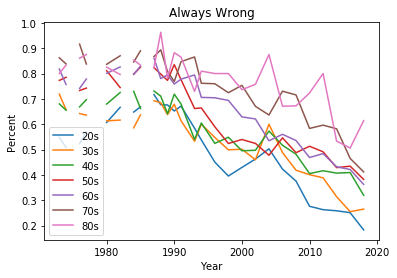

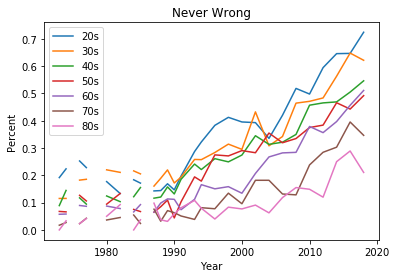

In [17]:
make_plots(percentages, 8)

### Period - Survey Year Completion

In [18]:
grouped_age = gss.groupby('age')

columns = ['year',
           '1972-1979 always',
           '1980-1987 always',
           '1988-1995 always',
           '1996-2003 always',
           '2004-2011 always',
           '2012-2018 always',
           '1972-1979 never',
           '1980-1987 never',
           '1988-1995 never',
           '1996-2003 never',
           '2004-2011 never',
           '2012-2018 never']

percentages = pd.DataFrame([], columns=columns)


for age, group in grouped_age:
    
    year1 = group[(group['year'] < 1980)]
    year3 = group[(group['year'] >= 1980) & (group['year'] < 1988)]
    year5 = group[(group['year'] >= 1988) & (group['year'] < 1996)]
    year7 = group[(group['year'] >= 1996) & (group['year'] < 2004)]
    year9 = group[(group['year'] >= 2004) & (group['year'] < 2012)]
    year11 = group[(group['year'] >= 2012) & (group['year'] <= 2018)]
    
    a1 = (year1['homosex'].dropna() == 1).mean()
    a3 = (year3['homosex'].dropna() == 1).mean()
    a5 = (year5['homosex'].dropna() == 1).mean()
    a7 = (year7['homosex'].dropna() == 1).mean()
    a9 = (year9['homosex'].dropna() == 1).mean()
    a11 = (year11['homosex'].dropna() == 1).mean()
    
    n1 = (year1['homosex'].dropna() == 4).mean()
    n3 = (year3['homosex'].dropna() == 4).mean()
    n5 = (year5['homosex'].dropna() == 4).mean()
    n7 = (year7['homosex'].dropna() == 4).mean()
    n9 = (year9['homosex'].dropna() == 4).mean()
    n11 = (year11['homosex'].dropna() == 4).mean()
    
    row = pd.DataFrame([[age,
                         a1, a3, a5, a7,a9, a11, n1, n3, n5, n7, n9, n11]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

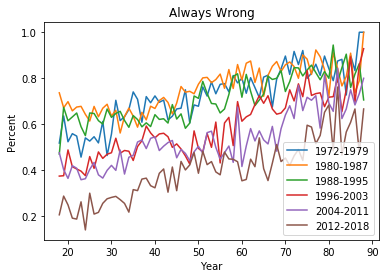

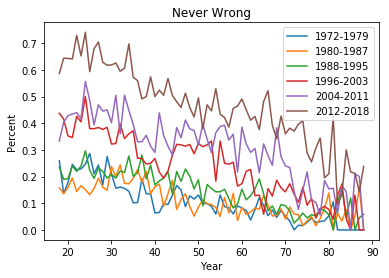

In [19]:
make_plots(percentages, 7)

### 16 Year Old Residence

In [20]:
grouped_year = gss.groupby('year')

columns = ['year',
           'country, nonfarm always',
           'farm always',
           'town <50000 always',
           '50000-250000 always',
           'big-city suburb always',
           'city >250000 always',
           'country, nonfarm never',
           'farm never',
           'town <50000 never',
           '50000-250000 never',
           'big-city suburb never',
           'city >250000 never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_res16 = group.groupby('res16')
    
    country = grouped_res16.get_group(1)['homosex'].dropna()
    farm = grouped_res16.get_group(2)['homosex'].dropna()
    town = grouped_res16.get_group(3)['homosex'].dropna()
    mid = grouped_res16.get_group(4)['homosex'].dropna()
    suburb = grouped_res16.get_group(5)['homosex'].dropna()
    city = grouped_res16.get_group(6)['homosex'].dropna()
           
    cna = (country.dropna() == 1).mean()
    fa = (farm.dropna() == 1).mean()
    ta = (town.dropna() == 1).mean()
    ma = (mid.dropna() == 1).mean()
    sa = (suburb.dropna() == 1).mean()
    ca = (city.dropna() == 1).mean()
    
    cnn = (country.dropna() == 4).mean()
    fn = (farm.dropna() == 4).mean()
    tn = (town.dropna() == 4).mean()
    mn = (mid.dropna() == 4).mean()
    sn = (suburb.dropna() == 4).mean()
    cn = (city.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, cna, fa, ta, ma, sa, ca, cnn, fn, tn, mn, sn, cn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

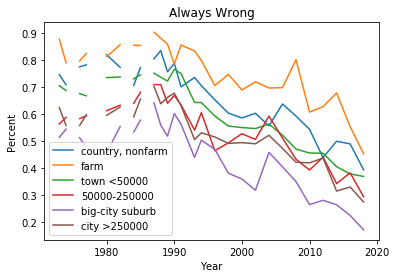

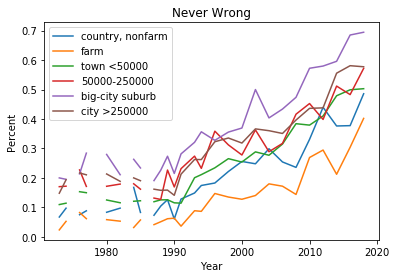

In [21]:
make_plots(percentages, 7)

### Region of Residence at 16

In [26]:
grouped_year = gss.groupby('year')

columns = ['year',
           'foreign always',
           'new england always',
           'mid atlantic always',
           'EN central always',
           'WN central always',
           'S atlantic always',
           'ES central always',
           'WS central always',
           'mountain always',
           'pacific always',
           'foreign never',
           'new england never',
           'mid atlantic never',
           'EN central never',
           'WN central never',
           'S atlantic never',
           'ES central never',
           'WS central never',
           'mountain never',
           'pacific never']

percentages = pd.DataFrame([], columns=columns)

for year, group in grouped_year:
    
    grouped_reg16 = group.groupby('reg16')
    
    foreign = grouped_reg16.get_group(0)['homosex'].dropna()
    ne = grouped_reg16.get_group(1)['homosex'].dropna()
    ma = grouped_reg16.get_group(2)['homosex']
    enc = grouped_reg16.get_group(3)['homosex'].dropna()
    wnc = grouped_reg16.get_group(4)['homosex'].dropna()
    sa = grouped_reg16.get_group(5)['homosex'].dropna()
    esc = grouped_reg16.get_group(6)['homosex'].dropna()
    wsc = grouped_reg16.get_group(7)['homosex'].dropna()
    mount = grouped_reg16.get_group(8)['homosex'].dropna()
    pac = grouped_reg16.get_group(9)['homosex'].dropna()
           
    fa = (foreign.dropna() == 1).mean()
    nea = (ne.dropna() == 1).mean()
    maa = (ma.dropna() == 1).mean()
    enca = (enc.dropna() == 1).mean()
    wnca = (wnc.dropna() == 1).mean()
    saa = (sa.dropna() == 1).mean()
    esca = (esc.dropna() == 1).mean()
    wsca = (wsc.dropna() == 1).mean()
    mal = (mount.dropna() == 1).mean()
    pa = (pac.dropna() == 1).mean()
    
    fn = (foreign.dropna() == 4).mean()
    nen = (ne.dropna() == 4).mean()
    man = (ma.dropna() == 4).mean()
    encn = (enc.dropna() == 4).mean()
    wncn = (wnc.dropna() == 4).mean()
    san = (sa.dropna() == 4).mean()
    escn = (esc.dropna() == 4).mean()
    wscn = (wsc.dropna() == 4).mean()
    mn = (mount.dropna() == 4).mean()
    pn = (pac.dropna() == 4).mean()
           
    row = pd.DataFrame([[year, fa, nea, maa, enca, wnca, saa, esca, wsca, mal, pa, fn, nen, man, encn, wncn, san, escn, wscn, mn, pn]], columns=columns)
    percentages = percentages.append(row, ignore_index=True)

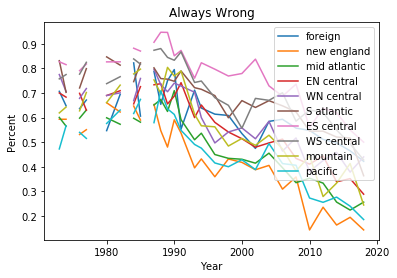

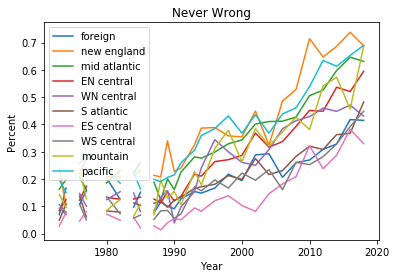

In [27]:
make_plots(percentages, 11)